Özdeğerler: [5. 2.]
Özvektörler:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
Süre: 0.001037 sn
RAM kullanımı: 0.30 MB


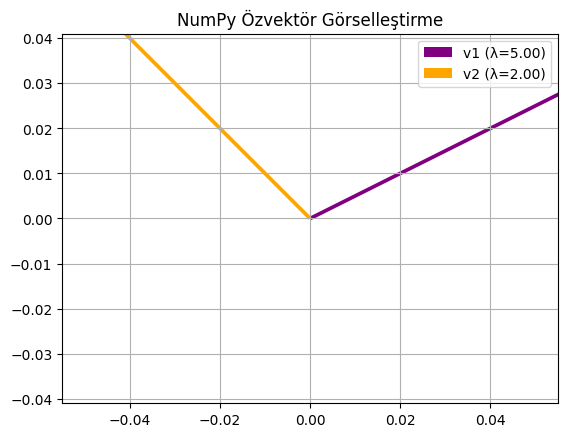

Büyük Matris (1000x1000):
Süre = 3.50 sn
RAM Kullanımı = 19.39 MB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
import pandas as pd

A = np.array([[4, 2], [1, 3]])

start_time = time.time()
mem_start = psutil.Process().memory_info().rss / 1024**2

eigvals, eigvecs = np.linalg.eig(A)

mem_end = psutil.Process().memory_info().rss / 1024**2
end_time = time.time()

print("Özdeğerler:", eigvals)
print("Özvektörler:\n", eigvecs)
print("Süre: {:.6f} sn".format(end_time - start_time))
print("RAM kullanımı: {:.2f} MB".format(mem_end - mem_start))

### Görselleştirme
origin = np.array([[0, 0]])
colors = ['purple', 'orange']
labels = [f"v{i+1} (λ={eigvals[i]:.2f})" for i in range(2)]

for i in range(2):
    plt.quiver(origin[:, 0], origin[:, 1], eigvecs[0, i], eigvecs[1, i],
               angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])

plt.grid()
plt.axis('equal')
plt.title("NumPy Özvektör Görselleştirme")
plt.legend()
plt.show()

### Büyük Matris ile Zaman ve RAM Karşılaştırması
np.random.seed(42)
big_matrix = np.random.rand(1000, 1000)

start = time.time()
mem_start = psutil.Process().memory_info().rss / 1024**2

eigvals_big, eigvecs_big = np.linalg.eig(big_matrix)

end = time.time()
mem_end = psutil.Process().memory_info().rss / 1024**2

print(f"Büyük Matris (1000x1000):\nSüre = {end - start:.2f} sn\nRAM Kullanımı = {mem_end - mem_start:.2f} MB")

# Tabloya ekle
df_report = pd.DataFrame({
    "Yöntem": ["NumPy"],
    "Matris Boyutu": ["1000x1000"],
    "Süre (sn)": [end - start],
    "RAM Kullanımı (MB)": [mem_end - mem_start]
})
df_report.to_csv("numpy_performance.csv", index=False)
